# Projet sur la base de donnée du Titanic

# Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importation de la base de donnée

In [2]:
df = pd.read_csv('train.csv', sep=',', encoding='utf-8')

# Vérification des bases de données

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description des différentes variable :
#### PassengerId : Une colonne ajoutée par Kaggle pour identifier chaque ligne,
#### Pclass : La classe de ticket que le passager à acheter (1=1ère, 2=2nd, 3=3ème)
#### Name : Nom des passagers
#### Sex : Homme ou Femme
#### Age : Age du passager
#### SibSp : Le nombre de frères et sœurs ou de conjoints que le passager avait à bord du Titanic
#### Parch : Le nombre de parents ou d'enfants que le passager avait à bord du Titanic
#### Ticket : Le numéro de ticket du passager
#### Fare : Le prix payé par le passager
#### Cabin : Le numéro de cabine
#### Embarked : La porte d'embarquement (C=Cherbourg, Q=Queenstown, S=Southampton)

## Vérification des valeurs manquantes

In [4]:
for col in df.columns:
    print('%s : %s, %s'%(col, len(df[col].unique()), len(df[df[col].isnull() == False]) / len(df) * 100))

PassengerId : 891, 100.0
Survived : 2, 100.0
Pclass : 3, 100.0
Name : 891, 100.0
Sex : 2, 100.0
Age : 89, 80.13468013468014
SibSp : 7, 100.0
Parch : 7, 100.0
Ticket : 681, 100.0
Fare : 248, 100.0
Cabin : 148, 22.895622895622896
Embarked : 4, 99.77553310886644


Text(0.5, 1, 'Dataset')

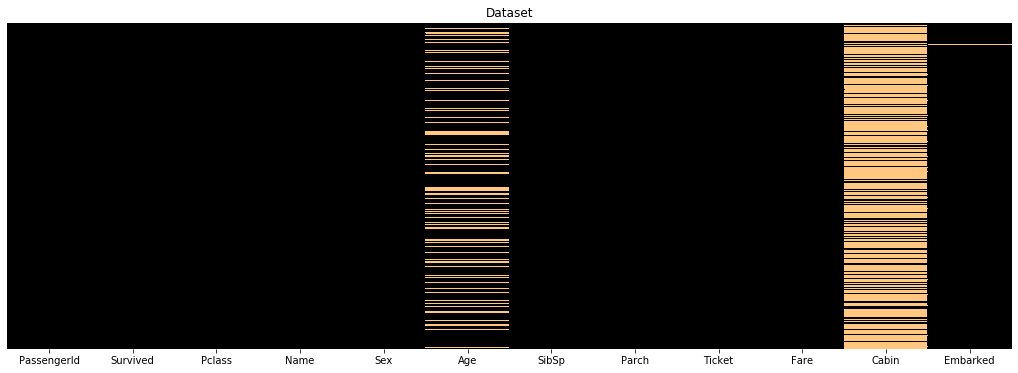

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

# This is a plot to show the missing values in the merged dataset
sns.heatmap(df.isnull(), yticklabels=False, ax = ax, cbar=False, cmap='copper')
ax.set_title('Dataset')

### On supprime un maximum de valeurs manquantes

On peut remarquer qu'il y a un grand nombre de valeurs manquantes dans la variable 'Cabin'. Il indique seulement le numéro de cabine, nous pouvons donc la supprimer.

On peut ensuite remarquer qu'un petit nombre de valeurs sont manquantes dans la variable 'Embarked'. En regardant dans l'information que nous avons eu, on peut voir qu'il manque seulement 2 valeurs que nous pouvons donc supprimer.

La variable 'Age' possède un certain nombre de valeurs manquantes. Seulement les valeurs à l'interrieur sont importante. Nous allons donc remplacer ces valeurs manquantes par la moyenne qui sera probablement le meilleur compromis.

In [6]:
del df['Cabin']

In [7]:
df.dropna(subset=['Embarked'], axis=0, inplace=True)

Pour la variable 'Age', nous allons la traiter prochainement. 

### Création d'une nouvelle variable

Nous allons créer une nouvelle variable 'Age_categories' qui va nous permettre de nommer certaines tranches d'âge.

Nous allons tout d'abord observer la moyenne de la variable 'Age' avant car nous allons modifier les valeurs manquantes ce qui va modifier aussi la moyenne. Nous en aurons besoins juste après.

In [8]:
df['Age'].mean()

29.64209269662921

Nous allons l'arrondir à 29.5 qui est le plus proche. La variable étant en float, nous pouvons mettre des chiffres à virgules.

Créons maintenant notre nouvelle variable 'Age_categories'

In [9]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

df = process_age(df,cut_points,label_names)
df['Age_categories'].value_counts()

Young Adult    358
Adult          194
Missing        177
Teenager        70
Infant          44
Child           25
Senior          21
Name: Age_categories, dtype: int64

Nous pouvons donc observer que notre nouvelle variable a bien été créée. 

Nous allons donc modifier les valeurs manquantes pour la moyenne que nous avons pu observer précédement.

In [10]:
df['Age'] = df['Age'].replace(-0.5, 29.5)

### Vérification finale de notre base de donnée

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId       889 non-null int64
Survived          889 non-null int64
Pclass            889 non-null int64
Name              889 non-null object
Sex               889 non-null object
Age               889 non-null float64
SibSp             889 non-null int64
Parch             889 non-null int64
Ticket            889 non-null object
Fare              889 non-null float64
Embarked          889 non-null object
Age_categories    889 non-null category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 84.6+ KB


Notre base de donnée n'a aucune valeur manquante. Nous pouvons donc créer un nouveau csv.

In [12]:
df.to_csv('train_clean.csv', sep=',', encoding='utf-8', index=False)